# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Shaked T. 4908

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Get guidance and step-by-step plan for the assignment.

Propmpt1: "Summarize the assignment instructions for supervised learning flow" 
    
Propmpt2:"Create a structured action plan with all steps required"
    
Propmpt3: "Explain how to start the project in practice and set up the initial notebook" 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

In this project, I will work with the Breast Cancer Wisconsin (Diagnostic) dataset.  
This is a supervised learning classification problem, where the goal is to predict whether a tumor is malignant or benign based on various medical measurements.  
The dataset contains numerical features such as mean radius, texture, perimeter, and smoothness of the tumor cell nuclei.  
The target variable is binary, representing the diagnosis outcome.  
This dataset is widely used as a benchmark for evaluating classification algorithms, and it allows us to compare different models and preprocessing methods while applying cross-validation and grid search to find the best-performing configuration.

    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# יצירת הטבלה
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# הצגת גדלים

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# הצגת חמש שורות ראשונות
X.head()


Features shape: (569, 30)
Target shape: (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# כמה דוגמאות מכל מחלקה (0 = malignant, 1 = benign)
y.value_counts()


target
1    357
0    212
Name: count, dtype: int64

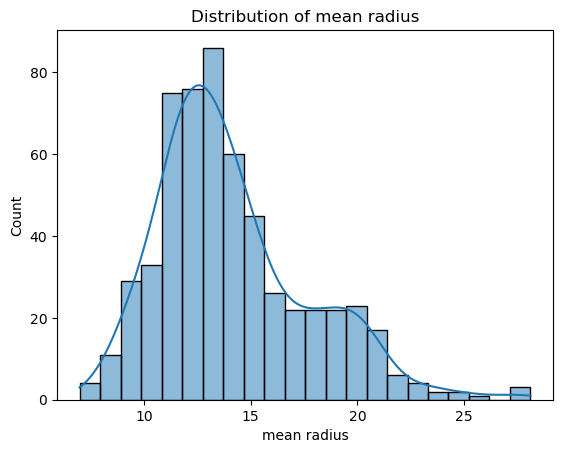

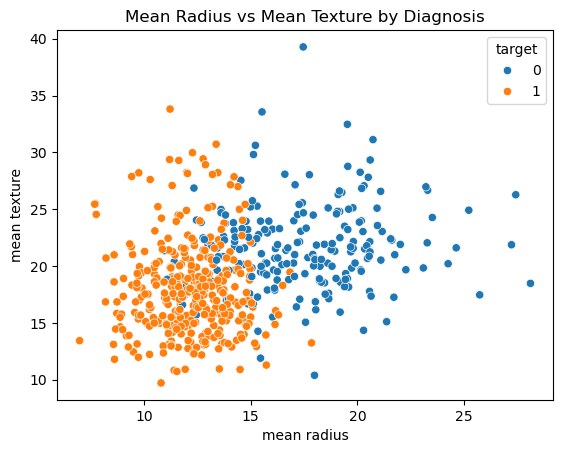

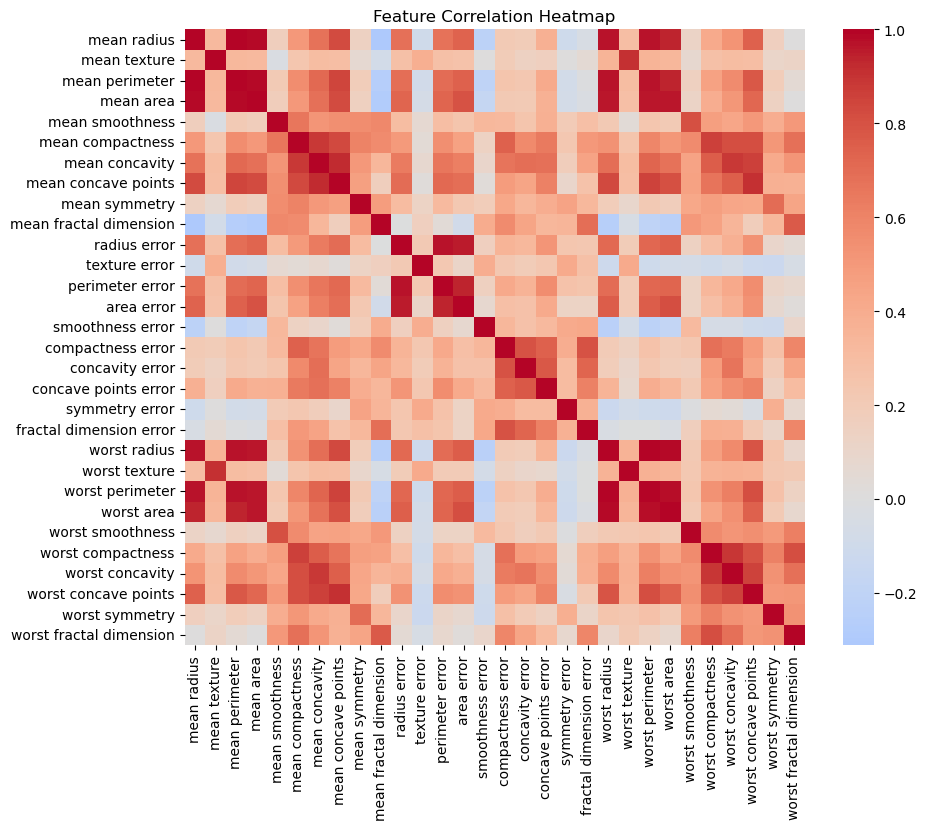

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# התפלגות של משתנה יחיד
sns.histplot(X['mean radius'], kde=True)
plt.title("Distribution of mean radius")
plt.show()

# קשר בין שני משתנים
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y)
plt.title("Mean Radius vs Mean Texture by Diagnosis")
plt.show()

# מטריצת קורלציות
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


The dataset contains 569 samples with 30 numerical features describing tumor characteristics.  
The target variable has two classes: malignant (212 samples) and benign (357 samples).  
From the histograms and scatter plots, we can observe that some features such as "mean radius" and "mean texture" show different distributions between the two classes.  
The correlation heatmap indicates that some features are strongly correlated, which may influence the choice of feature selection or regularization later in the experiments.


## Part 3 - Experiments
You could add as many code cells as needed

In [5]:
from sklearn.model_selection import train_test_split

# חלוקה לנתונים - train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# נגדיר אלגוריתם
log_reg = LogisticRegression(max_iter=500)

# נגדיר Grid של היפרפרמטרים
param_grid = {
    'C': [0.01, 0.1, 1, 10],       # Regularization strength
    'penalty': ['l1', 'l2'],       # סוג רגולריזציה
    'solver': ['liblinear']        # solver שתומך גם ב-l1
}

# נגדיר cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(log_reg, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV F1 score:", grid.best_score_)


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1 score: 0.9842241757556247


In [9]:
# טבלה של כל הפרמוטציות
results = pd.DataFrame(grid.cv_results_)
results[['params','mean_test_score','std_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)


,params,mean_test_score,std_test_score
5,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.984224,0.006625
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.982517,0.005500
1,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.977207,0.008971
4,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.973687,0.011150
2,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.971423,0.014710
7,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.970461,0.008795
6,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.962851,0.015383
0,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.930705,0.029244


In [10]:
best_model = grid.best_estimator_


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# נשלוף את ההיפרפרמטרים הטובים מ־GridSearchCV של חלק 3
best_params = grid.best_params_
best_params




{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [12]:
# בונים pipeline שמכיל גם את ה-Feature Engineering (Scaler) וגם את המודל עם הפרמטרים המנצחים
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        **{k: v for k, v in best_params.items() if k in ["C", "penalty", "solver"]},
        max_iter=500,
    )
)

# אימון סופי על כל סט האימון
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=500, solver='liblinear'))])

We re-trained a final pipeline on the full training set using the best configuration
(found via 5-fold cross-validated grid search in Part 3).  
The pipeline includes StandardScaler for feature engineering and a Logistic Regression
model with the selected hyperparameters.


## Part 5 - Apply on test and show model performance estimation

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# חיזוי
y_pred = clf.predict(X_test)

# ציון F1 (בברירת מחדל pos_label=1, וזה מתאים כאן כי 1=benign היא המחלקה המרכזית)
f1 = f1_score(y_test, y_pred)
print("F1 score (binary, positive=1):", round(f1, 4))

# דוח מלא 
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["malignant(0)", "benign(1)"]))


F1 score (binary, positive=1): 0.9861

Classification report:
              precision    recall  f1-score   support

malignant(0)       0.98      0.98      0.98        42
   benign(1)       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



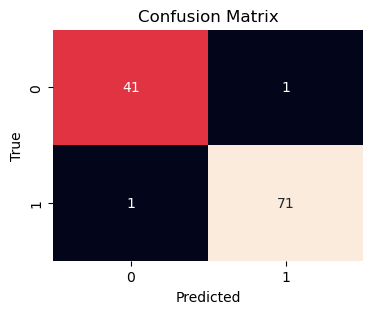

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=["0","1"], yticklabels=["0","1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [15]:
import numpy as np
import pandas as pd

# הסתברויות למחלקה החיובית (1)
proba = clf.predict_proba(X_test)[:, 1]

sample = pd.DataFrame({
    "true": y_test.values[:5],
    "pred": y_pred[:5],
    "proba_for_class_1": np.round(proba[:5], 3)
})
sample


,true,pred,proba_for_class_1
0,0,0,0.000
1,1,1,1.000
2,0,0,0.006
3,1,1,0.529
4,0,0,0.000


**Evaluation on the held-out test set:**  
We evaluated the final pipeline on the test set using the F1 score for the central (positive) class = 1 (benign).  
We also present the confusion matrix and show a few example predictions (including predicted probabilities).
